## Instructions

*   Install the required modules
*   place the data file on the same directory by name 'Sentiment140.tenPercent.sample.tweets.tsv'
*   It takes more than 6 minutes to complete execution. While running please wait sometime till complete.



## Prerequisite Step


*   Module installation
*   Data Uploading



In [1]:
!pip install pandas numpy tensorflow scikit-learn nltk
!pip install WordCloud
!pip install --upgrade tensorflow


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, Conv1D, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

from matplotlib import pyplot as plt
import seaborn as sns

nltk.download('stopwords')


C:\Users\DELL\AppData\Local\Temp\ipykernel_54860\3253193002.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# from google.colab import files
# uploaded = files.upload()

# Data Prepocessing

*   Data Loading
*   Null Value checking
*   View Data
*   Data Visualization
*   Text transformation and remove link special characters

In [4]:
df = pd.read_csv("Sentiment140.tenPercent.sample.tweets.tsv",delimiter='\t')

df.describe


<bound method NDFrame.describe of         sentiment_label                                         tweet_text
0                     4  @elephantbird Hey dear, Happy Friday to You  A...
1                     4  Ughhh layin downnnn    Waiting for zeina to co...
2                     0  @greeniebach I reckon he'll play, even if he's...
3                     0              @vaLewee I know!  Saw it on the news!
4                     0  very sad that http://www.fabchannel.com/ has c...
...                 ...                                                ...
159995                0  STILL @ panera...studying for &quot;mock&quot;...
159996                0  Insomnia is out of control tonight--haven't sl...
159997                4            @Covergirl08 I take pride in what I do 
159998                4                          heading to work on the 6 
159999                4                                   @queith asi es! 

[160000 rows x 2 columns]>

In [5]:
df.columns

Index(['sentiment_label', 'tweet_text'], dtype='object')

In [6]:
df.shape

(160000, 2)

In [7]:
df.head(100)

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...
...,...,...
95,0,i don't feel like art-ing now
96,4,pro-cras-ti-nating. (verb) to put of till anot...
97,0,oh and i cant forget my COW who doesnt even kn...
98,0,I really need to work on my sleep schedule.


In [8]:
df.isnull().values.any()

False

In [9]:
# Replacing the values to ease understanding :
df['sentiment_label'] = df['sentiment_label'].replace(4,1)

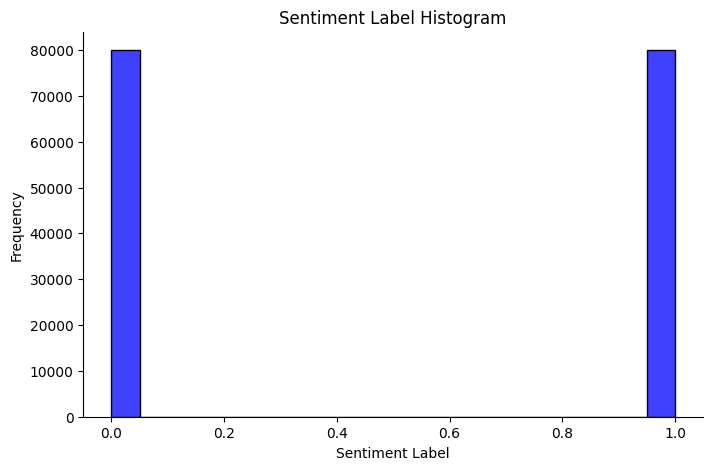

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_label'], bins=20, kde=False, color='blue')

sns.despine(right=True, top=True)
plt.title('Sentiment Label Histogram')
plt.xlabel('Sentiment Label')  
plt.ylabel('Frequency')  

plt.show()

In [11]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # covert to lower case
    sentence = sentence.lower().strip()

    return sentence


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [12]:
df["tweet_text"] = df["tweet_text"].apply(preprocess_text)

In [13]:
df.head(100)

,sentiment_label,tweet_text
0,1,elephantbird hey dear happy friday to you alre...
1,1,ughhh layin downnnn waiting for zeina to cook ...
2,0,greeniebach reckon he ll play even if he not b...
3,0,valewee know saw it on the news
4,0,very sad that http www fabchannel com has clos...
...,...,...
95,0,i don feel like art ing now
96,1,pro cras ti nating verb to put of till another...
97,0,oh and cant forget my cow who doesnt even know...
98,0,i really need to work on my sleep schedule


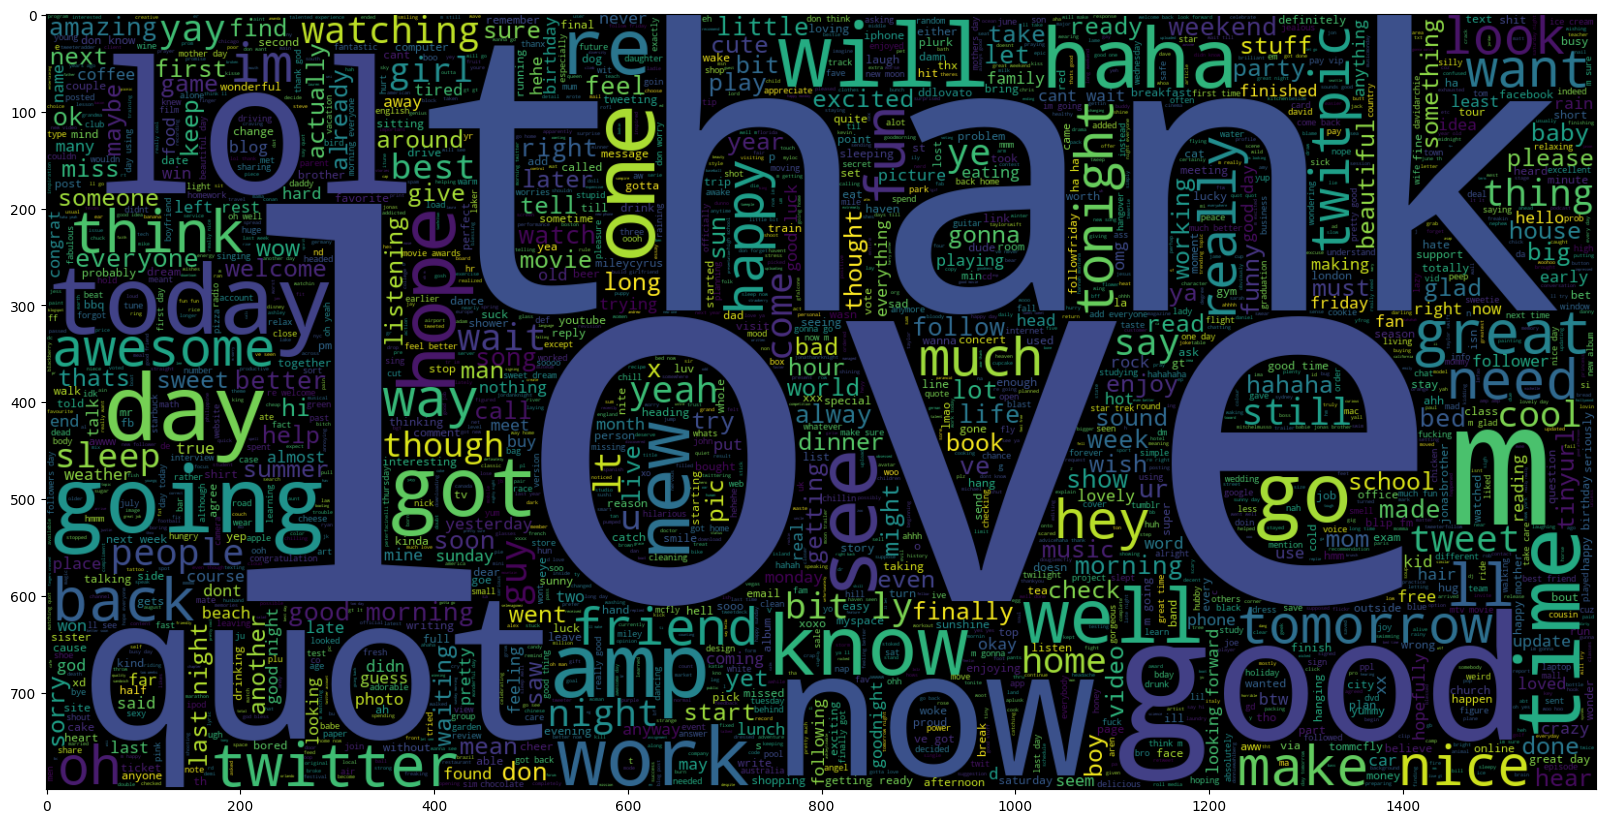

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(" ".join(df[df.sentiment_label==1].tweet_text))
plt.imshow(wc, interpolation='bilinear')

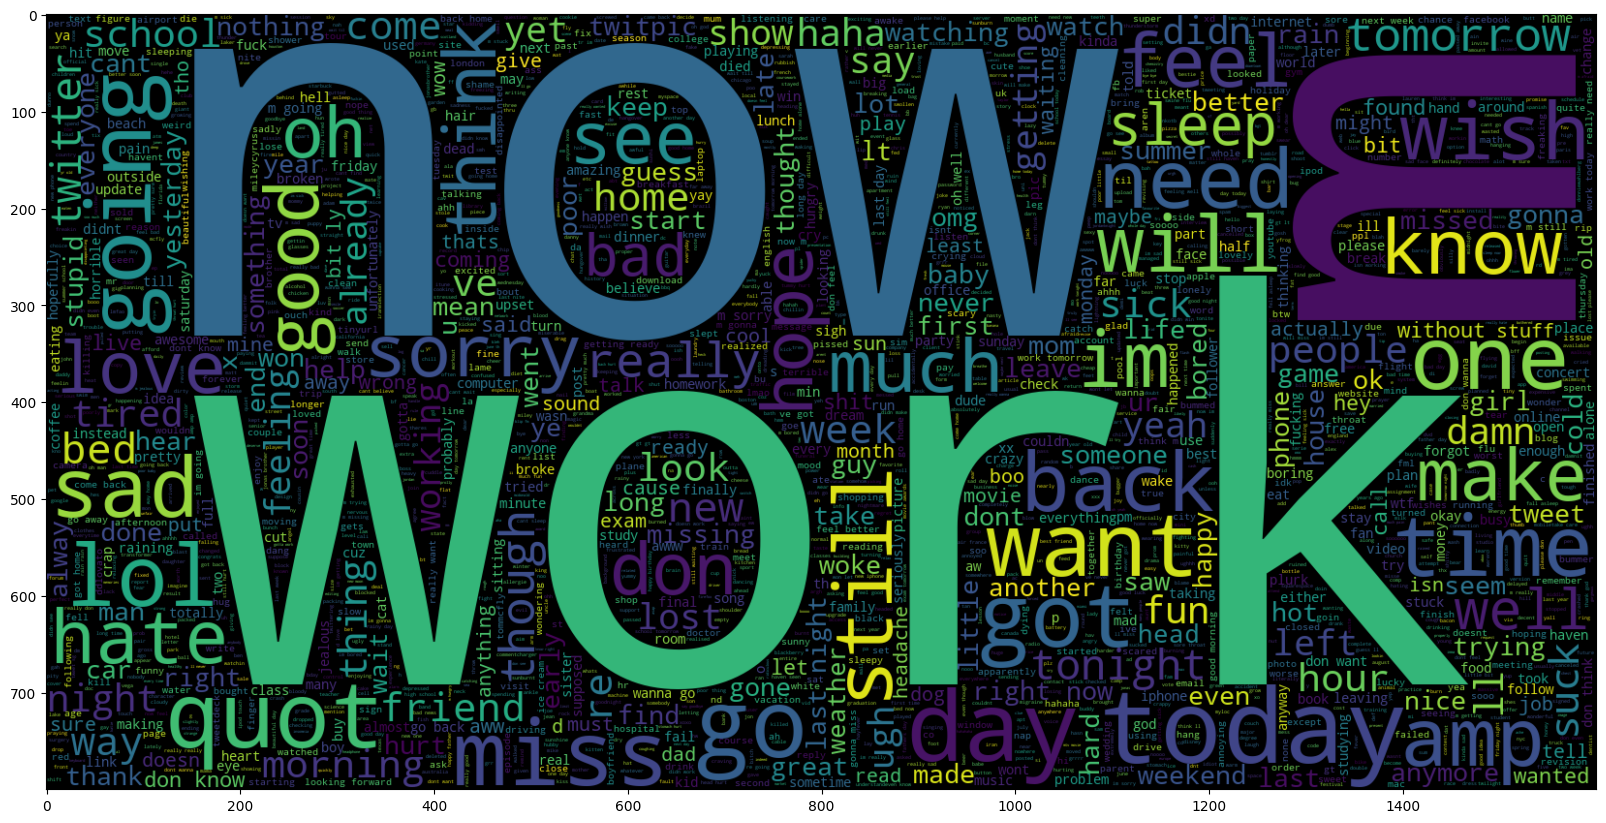

In [15]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800).generate(" ".join(df[df.sentiment_label==0].tweet_text))
plt.imshow(wc, interpolation='bilinear')

# Model Training 

In [16]:
# X = df['tweet_text']
# y = df['sentiment_label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(X_train)

# X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

In [18]:
# # Adding 1 because of reserved 0 index
# vocab_size = len(tokenizer.word_index) + 1

# maxlen = 100

# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [19]:
# from numpy import array
# from numpy import asarray
# from numpy import zeros

# embeddings_dictionary = dict()
# glove_file = open('glove.6B.100d.txt', encoding="utf8")

# for line in glove_file:
#     records = line.split()
#     word = records[0]
#     vector_dimensions = asarray(records[1:], dtype='float32')
#     embeddings_dictionary [word] = vector_dimensions
# glove_file.close()

In [20]:
# embedding_matrix = zeros((vocab_size, 100))
# for word, index in tokenizer.word_index.items():
#     embedding_vector = embeddings_dictionary.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[index] = embedding_vector

In [21]:
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# import numpy as np
# from tensorflow.keras.layers import Flatten, GRU, Dense, Flatten, Embedding
# from tensorflow.keras.models import Sequential

# model = Sequential()
# model.add(Embedding(vocab_size, 100))
# model.add(GRU(units=32,dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# print(model.summary())

# model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

# model = Sequential()
# embedding_layer = Embedding(vocab_size, 100 , trainable=False)
# model.add(embedding_layer)
# model.add(LSTM(128))

# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# print(model.summary())

# history = model.fit(X_train, y_train, batch_size=10000, epochs=6, verbose=1, validation_split=0.2)

# score = model.evaluate(X_test, y_test, verbose=1)

# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

Accuracy: 0.76
Precision: 0.77
Recall: 0.74
F1-score: 0.76
Confusion Matrix:
 [[12554  3448]
 [ 4134 11864]]


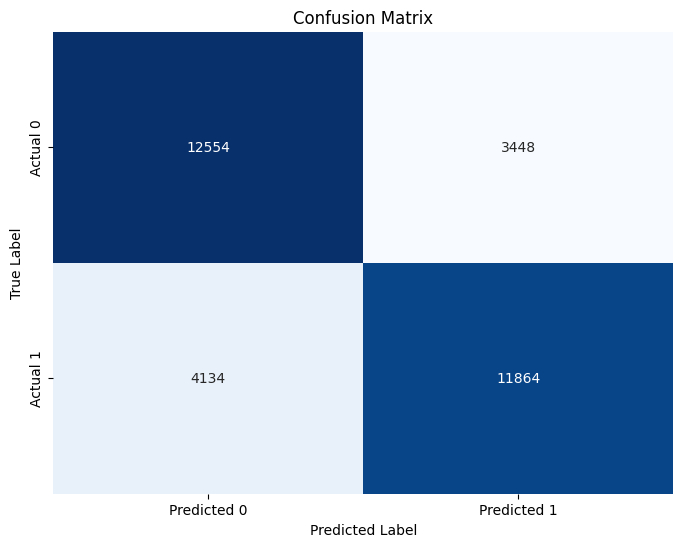

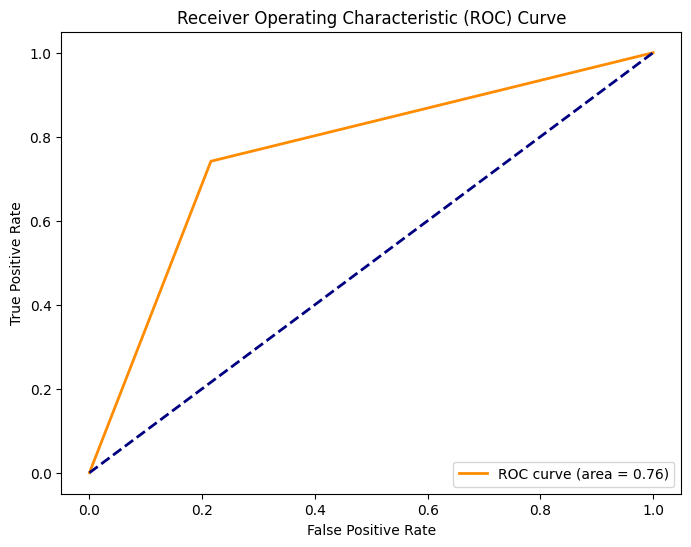

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df['tweet_text'], df['sentiment_label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)


rf_predictions = rf_classifier.predict(X_test_vectorized)


rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Accuracy: {rf_accuracy:.2f}')

precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, rf_predictions)
print('Confusion Matrix:\n', conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


fpr, tpr, _ = roc_curve(y_test, rf_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.78
Precision: 0.77
Recall: 0.79
F1-score: 0.78
Confusion Matrix:
 [[12158  3844]
 [ 3304 12694]]


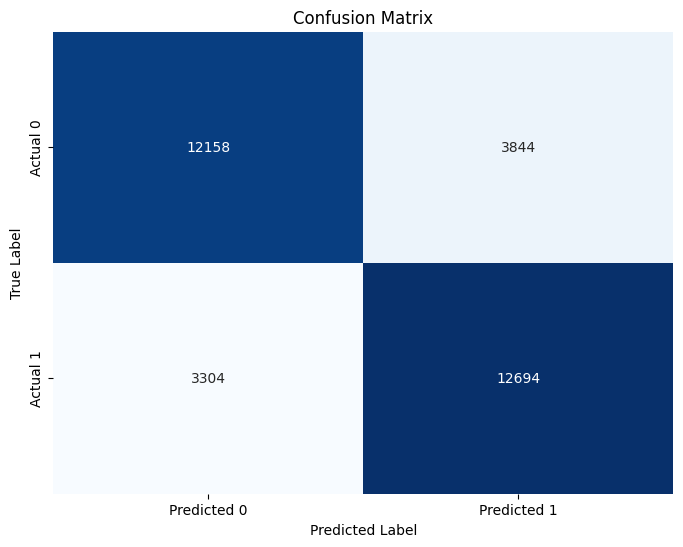

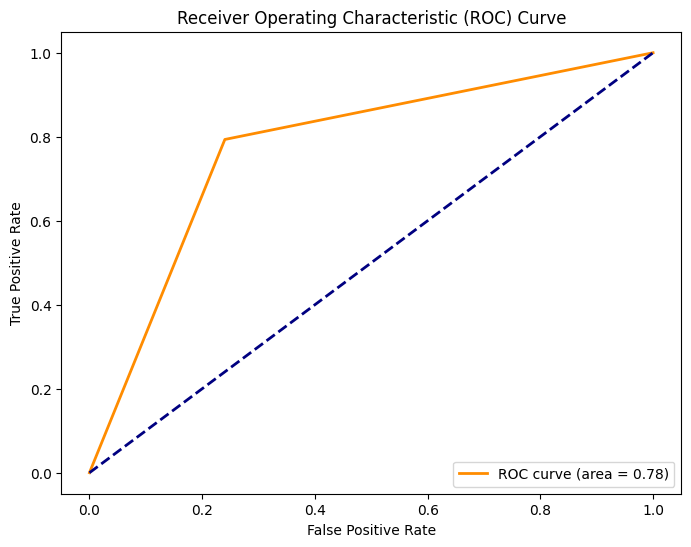

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X = df['tweet_text']
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

svm_predictions = svm_model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, svm_predictions)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, svm_predictions)
recall = recall_score(y_test, svm_predictions)
f1 = f1_score(y_test, svm_predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, svm_predictions)
print('Confusion Matrix:\n', conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


fpr, tpr, _ = roc_curve(y_test, svm_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_54860\208825646.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Random Forest', 'SVM'], y=[model1_accuracy, model2_accuracy], palette='viridis')


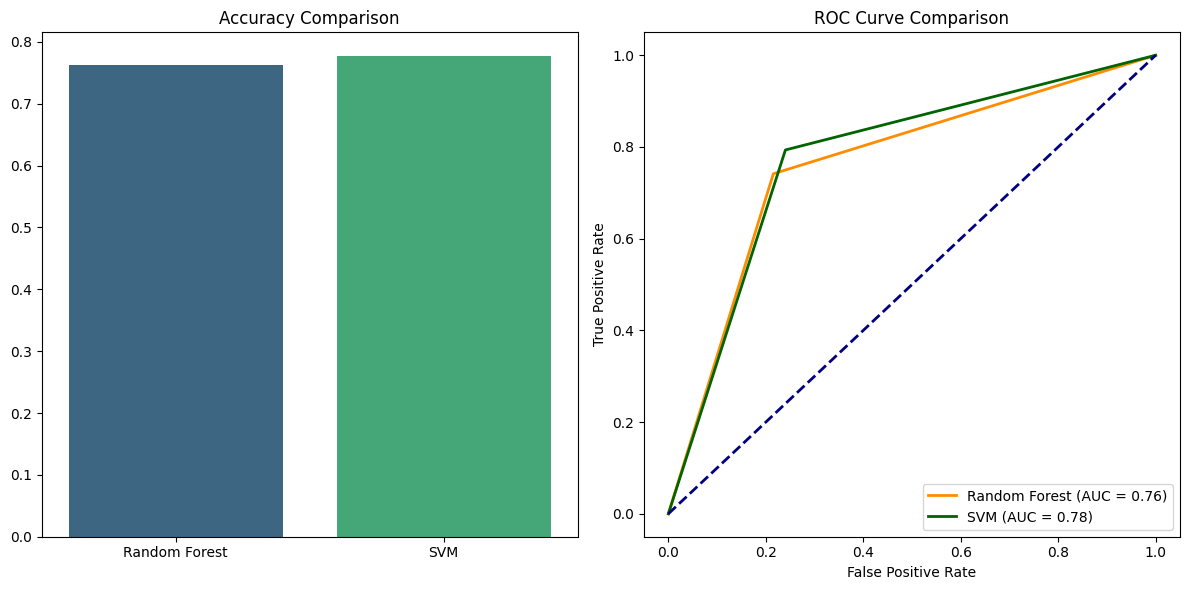

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


model1_accuracy = accuracy_score(y_test, rf_predictions)
model2_accuracy = accuracy_score(y_test, svm_predictions)

model1_precision = precision_score(y_test, rf_predictions)
model2_precision = precision_score(y_test, svm_predictions)

model1_recall = recall_score(y_test, rf_predictions)
model2_recall = recall_score(y_test, svm_predictions)

model1_f1 = f1_score(y_test, rf_predictions)
model2_f1 = f1_score(y_test, svm_predictions)

fpr_model1, tpr_model1, _ = roc_curve(y_test, rf_predictions)
roc_auc_model1 = auc(fpr_model1, tpr_model1)

fpr_model2, tpr_model2, _ = roc_curve(y_test, svm_predictions)
roc_auc_model2 = auc(fpr_model2, tpr_model2)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(x=['Random Forest', 'SVM'], y=[model1_accuracy, model2_accuracy], palette='viridis')
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.plot(fpr_model1, tpr_model1, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_model1:.2f})')
plt.plot(fpr_model2, tpr_model2, color='darkgreen', lw=2, label=f'SVM (AUC = {roc_auc_model2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
